Utility functions and imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def clamp(value, low, high):
    return max(low, min(value, high))

The output is the motor torque (acceleration) and the input is the distance moved. This can be written as

$$x"=m \left(p\left(SP-x\right)+i \int \left(SP-x\right) dt +d \left(\frac{d\left(SP-x\right)}{dt} \right)\right)$$

The second derivative can be discretized as

$$x"\approx\frac{\frac{x_j-x_{j-1}}{\Delta t}-\frac{x_{j-1}-x_{j-2}}{\Delta t}}{\Delta t}=\frac{x_j-2x_{j-1}+x_{j-2}}{\Delta t}$$

Discretization yields

$$\frac{x_j-2x_{j-1}+x_{j-2}}{\Delta t}=m \left(p\left(SP-x_j\right)+i \sum_j \left(SP-x_j\right) \cdot \Delta t +d \left(\frac{x_{j-1}-x_j}{\Delta t} \right)\right)$$

We are now dropping the $\Delta t$ terms for the integral and derivative terms because WPILib does not include them:

$$\frac{x_j-2x_{j-1}+x_{j-2}}{\Delta t}=m \left(p\left(SP-x_j\right)+i \sum_j \left(SP-x_j\right) +d \left(x_{j-1}-x_j \right)\right)$$

Solving for $x_{j}$ is done as follows:

$$x_j-2x_{j-1}+x_{j-2}=m \Delta t \left(p\left(SP-x_j\right)+i \sum_j \left(SP-x_j\right) +d \left(x_{j-1}-x_j \right)\right)$$

$$x_j=2x_{j-1}-x_{j-2} + m \Delta t \left(p\left(SP-x_j\right)+i \sum_j \left(SP-x_j\right) +d \left(x_{j-1}-x_j \right)\right)$$

Solution settings and PID parameters:

In [3]:
# Timesteps and number of steps
nt=300
dt=0.02
# PID params
p=0.01
i=0#0.000001
d=0.01
minout=-1
maxout=1
motorpower=100

In [4]:
# Initialize variables
timerange=np.arange(0,nt*dt,dt)
setpointarray=np.full((nt),100)
setpointarray[nt//2:]=0
out=np.zeros(nt)
pidoutraw=np.zeros(nt)
pidout=np.zeros(nt)
porpout=np.zeros(nt)
integout=np.zeros(nt)
derivout=np.zeros(nt)

In [5]:
# Wrapraound is safe because of constant initialization
integsum=0
for index in range(1,nt):
    err=setpointarray[index-1]-out[index-1]
    # Proportional term
    porp=p*err
    porpout[index]=porp
    # Integral term
    integsum+=err
    integ=i*integsum
    integout[index]=integ
    # Derivative term
    deriv=d*(out[index-2]-out[index-1])
    derivout[index]=deriv
    # Add together
    newout=porp+integ+deriv
    pidoutraw[index]=newout
    # Clamp output
    newout=clamp(newout,minout,maxout)
    pidout[index]=newout
    # Write to final output
    out[index]=2*out[index-1]-out[index-2]+dt*motorpower*newout

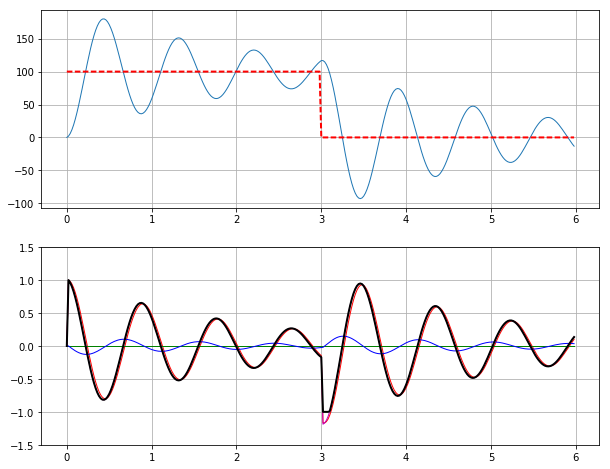

In [6]:
plt.subplot(211)
plt.plot(timerange,out,lw=1)
plt.plot(timerange,setpointarray,'r--',lw=2)
plt.grid()
plt.subplot(212)
plt.plot(timerange,porpout,'r',lw=1)
plt.plot(timerange,integout,'g',lw=1)
plt.plot(timerange,derivout,'b',lw=1)
plt.plot(timerange,pidoutraw,'m',lw=1)
plt.plot(timerange,pidout,'k',lw=2)
plt.ylim(1.5*minout,1.5*maxout)
plt.grid()
plt.show()

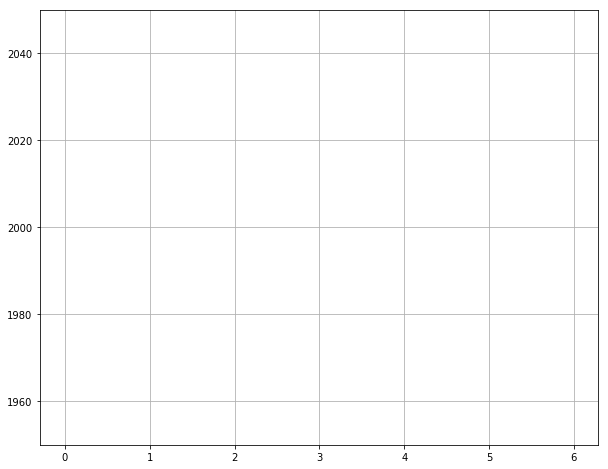

In [7]:
plt.plot(timerange,out,lw=1)
plt.plot(timerange,setpointarray,'r--',lw=2)
plt.ylim(1950,2050)
plt.grid()

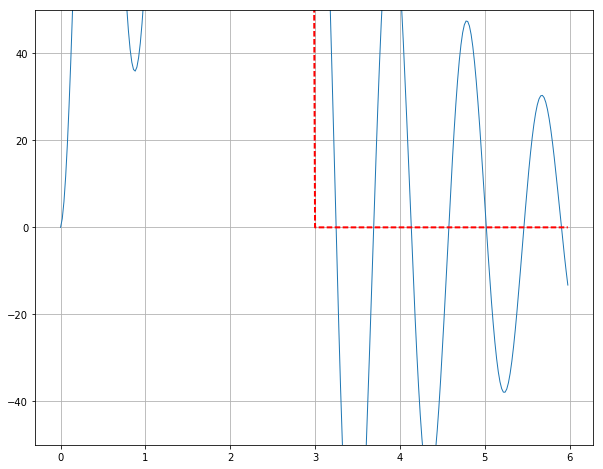

In [8]:
plt.plot(timerange,out,lw=1)
plt.plot(timerange,setpointarray,'r--',lw=2)
plt.ylim(-50,50)
plt.grid()